<a href="https://colab.research.google.com/github/suhyeon03/study_ML_/blob/main/_regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 회귀

In [ ]:
# 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것이다.
# 지도학습의 두 축인 분류와 회귀의 차이는 예측값이 카테고리와 같은 이산형 클래스 값은 -> 분류, 연속형 숫자 -> 회귀
# 규제란 일반적인 선형 회귀의 과적합 문제를 해결하기 위한 회귀 계수에 페널티 값을 적용하는 것을 말한다.
# 일반 선형 회귀 - 규제를 적용 하지 않은 모델
# 릿지 - 선형회귀에 L2 규제를 추가한 모델
# 라쏘 - 선형회귀에 L1 규제를 추가한 모델
# 엘라스틱넷 - L2,L1 규제를 함계 결합한 모델
# 로지스틱 회귀 - 분류에 사용되는 선형 모델
# 최적의 회귀모델을 만든다는 것은 전체 데이터의 잔차(오류값) 합이 최소가 되는 모델을 만드는 것이다.
# 오류 값은 +나 -가 될 수 있어서 절대값을 취하거나, 오류값의 제곱을 구해서 더하느 방식을 취한다.
# RSS -> 비용함수
# 비용함수가 최소가 되는 W 파라미터를 구할 수 있을까? -> 경사하강법
# 경사하강법의 핵심은 어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까?
# --> 편미분

##1-1. 경사하강법 파이썬 구현

In [ ]:
# Step 1 : W1,W0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산한다.
# Step 2 : W1과 W0을 업데이트하고 다시 비용 함수의 값을 계산한다.
# Step 3 : 비용 함수가 감소하느 방향성으로 주어진 횟수만큼 Step 2를 반복하면서 W1과 W0를 계속 업데이트 한다.

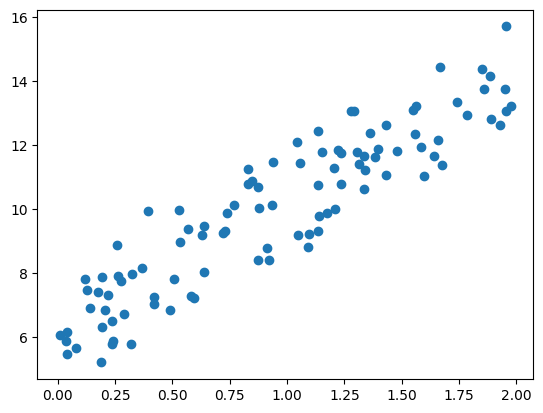

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)


In [21]:
def get_cost(y, y_tesr):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [22]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

w1:[0:.3f]
Gradient Descent Total Cost: 0.9935


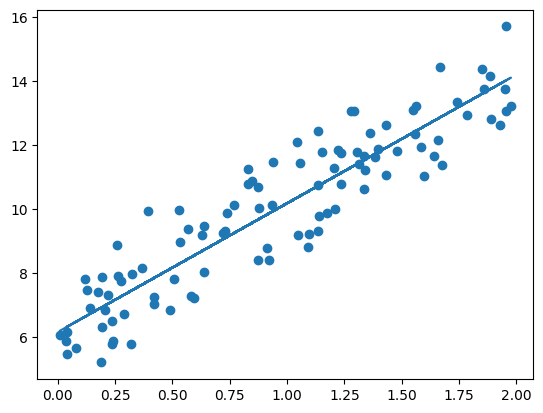

In [24]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:[0:.3f]'.format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

plt.scatter(X, y)
plt.plot(X, y_pred)

##1-2. (미니 배치) 확률적 경사하강법 파이썬 구현

In [ ]:
# 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도 보장
# 앞서 생성한 gradient_descent_steps()와 크게 다르지 않다. 다만 전체 데이터 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해
# 이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이가 있다.

In [25]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[:batch_size]]
        sample_y = y[stochastic_random_index[:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


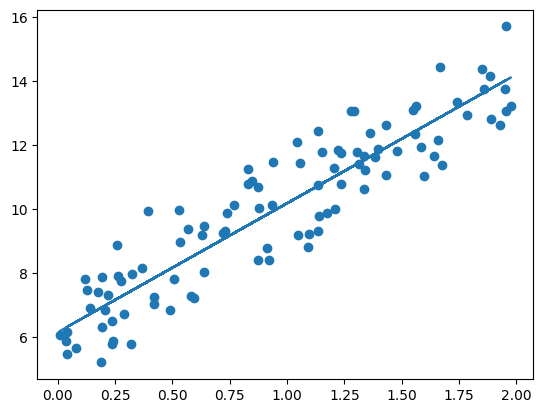

In [26]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3), "w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

plt.scatter(X, y)
plt.plot(X, y_pred)